In [1]:
# pandas is a python library to process data as dataframe
import pandas as pd

### useful resources: 
https://elitedatascience.com/python-cheat-sheet
https://github.com/practicalAI/practicalAI/blob/4ad626098aca25db5628fe67895e738d5a5c2c2a/notebooks/03_Pandas.ipynb

## Pandas Bascis

In [20]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv("data.csv");

In [7]:
# Show the size of data
df.shape

(18207, 89)

In [21]:
# first five items
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [33]:
# describe features
df.describe();

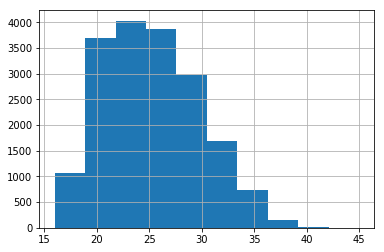

In [13]:
# Histograms
df["Age"].hist()

In [32]:
# Unique values
df["Nationality"].head();

In [31]:
# selecting data by feature
df['Club'].head();

In [30]:
# filtering
df[df["Nationality"]=="Argentina"].head();

In [29]:
# sorting
df.sort_values("International Reputation", ascending=False).head();

In [28]:
# grouping
club_group = df.groupby("Club")
club_group.mean().head();

In [27]:
# Selecting row
df.iloc[0]; # iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

In [25]:
# Selecting specific value
df.iloc[0, 1]

158023

In [36]:
# Selecting by index
df.loc[0]; # loc gets rows (or columns) with particular labels from the index

## preprocessing

In [64]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].shape

(18207, 89)

In [41]:
# Drop rows with NaN values
# df = df.dropna() # removes rows with any NaN values
# df = df.reset_index() # reset's row indexes in case any rows were dropped
# df.head()

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [65]:
# Dropping multiple columns
df = df.drop(["Nationality", "Club"],axis = 1)

**exercise: which player is undervalued?**
- Value
- Wage
- Name

In [87]:
df_value = df[["Name","Wage","Value" ]]
df_value.head()

,Name,Wage,Value
0,L. Messi,€565K,€110.5M
1,Cristiano Ronaldo,€405K,€77M
2,Neymar Jr,€290K,€118.5M
3,De Gea,€260K,€72M
4,K. De Bruyne,€355K,€102M


In [101]:
import re
def extract_numbers(s):
    if type(s) == float or type(s) == int:
        return s
    s = s.replace("€","")
    if "K" in s:
        return float(s.replace("K",""))*1000
    if "M" in s:
        return float(s.replace("M",""))*1000000
    if "B" in s:
        return float(s.replace("B",""))*1000000000
    return 0.0
extract_numbers("€110.5M")

df_value['Value'] = df_value['Value'].apply(extract_numbers)
df_value['Wage'] = df_value['Wage'].apply(extract_numbers)

c:\users\leifu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\leifu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [102]:
df_value.head()

,Name,Wage,Value
0,L. Messi,565000.0,110500000.0
1,Cristiano Ronaldo,405000.0,77000000.0
2,Neymar Jr,290000.0,118500000.0
3,De Gea,260000.0,72000000.0
4,K. De Bruyne,355000.0,102000000.0


In [103]:
df_value['difference'] = df_value["Value"]-df_value["Wage"]

c:\users\leifu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_value.sort_values(by=['difference'],ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
16,H. Kane,205000.0,83500000.0,83295000.0
25,K. Mbappé,100000.0,81000000.0,80900000.0
7,L. Suárez,455000.0,80000000.0,79545000.0
17,A. Griezmann,145000.0,78000000.0,77855000.0
10,R. Lewandowski,205000.0,77000000.0,76795000.0


In [108]:
import seaborn as sns

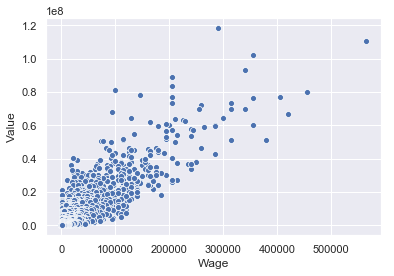

In [110]:
sns.set()
graph = sns.scatterplot(x="Wage",y="Value",data = df_value)
graph

In [117]:
# bokeh library allows inteactive action
from bokeh.plotting import figure,show
from bokeh.models import HoverTool
TOOLTIPS=[
    ("index","$index"),
    ("(Wage,Value)","(@Wage,@Value)"),
    ("Name","@Name"),
]
hover = HoverTool(tooltips=TOOLTIPS)

In [118]:
p = figure(title="Soccer 2019",x_axis_label="Wage",y_axis_label = "Value", plot_width=700, plot_height=700, tools=[hover])
p.circle("Wage","Value",size=10,source=df_value)
show(p)